## Observations and Insights 

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats as linregress
from sklearn import dataset
import random


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# merge
merge_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "left")

# Display the data table for preview
merge_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [70]:
# Checking the number of mice.
# mouse ID
# .count()
mice_count = merge_data["Mouse ID"].count()

#print
mice_count

1893

In [71]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#duplicated not duplicate
duplicate_mice = merge_data.loc[merge_data.duplicated(["Mouse ID", "Timepoint"])]

#print
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [72]:
# Optional: Get all the data for the duplicate mouse ID. 
#not sure if this is right? it's all data, I think.
duplicate_mice_data = merge_data[merge_data.duplicated(["Mouse ID"])]

#print
duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [73]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# .drop_duplicates
clean_df = merge_data.drop_duplicates("Mouse ID")

#print
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [74]:
# Checking the number of mice in the clean DataFrame.
# .count()
clean_mouse_count = clean_df["Mouse ID"].count()

#print
clean_mouse_count

249

## Summary Statistics

In [75]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# "Drug Regimen" -> each drug
# tumor volume = "Tumor Volume (mm3)"
# .groupby()

# mean
# .mean()
mean = merge_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

#print to view
mean

# median
# .median()
median = merge_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

#print to view
median

# variance
# .var()
variance = merge_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

#print to view
variance

# standard Deviation
# .std()
standart_dev = merge_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

#print to view
standart_dev

# SEM
# .sem()
sem = merge_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

#print to view
sem

# summary DataFrame [Mean, Median, Variance, Standard Deviation, SEM]
summary_df = pd.DataFrame({"Mean" : mean, "Median" : median, "Variance" : variance, "Standard Deviation" : standart_dev, "SEM" : sem})

#print
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [76]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_df

# Using the aggregation method, produce the same summary statistics in a single line
#df.groupby('A').agg({'B': ['min', 'max']})

#aggregate
#clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)"" : ["min", "max"]})
#summary_df_agg = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean", "median", "variance" "standard deviation", "sem"]})

#print
#summary_df_agg

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

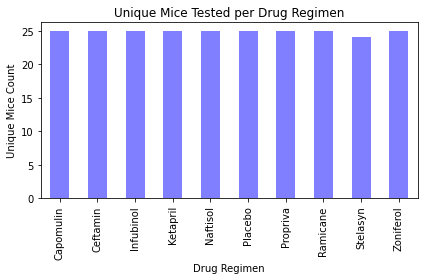

In [77]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# .count()
#merge_data or clean.df?
unique_mice_bar_plot = clean_df.groupby("Drug Regimen")["Mouse ID"].count()

unique_mice_bar_plot.plot(kind="bar", color="b", alpha=0.5, align="center")

# Give our chart some labels and a tile
plt.title("Unique Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Unique Mice Count")


#print
plt.show
plt.tight_layout() 

<function matplotlib.pyplot.show(*args, **kw)>

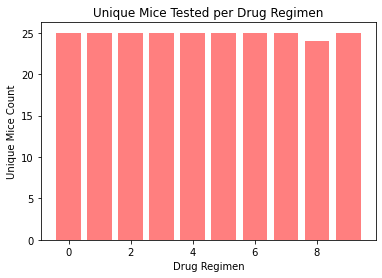

In [78]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#if I understand the question it is to same as above but instead pyplot. 

#get list of all drug regimen
drug_regimen_list = summary_df.index.tolist()

#print
drug_regimen_list

#fix data
drug_regimen_count = clean_df.groupby("Drug Regimen")["Mouse ID"].count()

#set axis
#add import numpy as np - to use
x_axis = np.arange(len(drug_regimen_count))

plt.bar(x_axis, drug_regimen_count, color='r', alpha=0.5, align="center")
plt.bar

# Give our chart some labels and a tile
plt.title("Unique Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Unique Mice Count")


#print
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

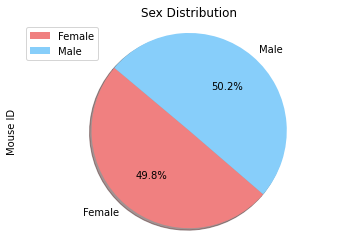

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# .groupby()
# .count()
gender_df = pd.DataFrame(clean_df.groupby(["Sex"]).count())

#print
gender_df

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
#needs y column or 'subplots=True
#NEED Y COLUMN TO ONLY SHOW GENDERS -> IF NOT SHOWS ALL DRUGS ... LOL
gender_df.plot(kind = "pie", y="Mouse ID", labels=labels,colors=colors, autopct="%1.1f%%", shadow=True, startangle=140, subplots=True)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

plt.title("Sex Distribution")
#print
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

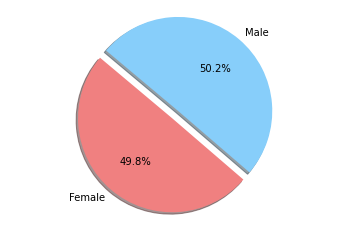

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df_pyplot = pd.DataFrame(clean_df.groupby(["Sex"])["Mouse ID"].count())

#labels for the sections of the pie chart
labels = ["Female", "Male"]

#colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

#tells matplotlib to seperate section from the others
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(gender_df_pyplot, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

#print
plt.show

## Quartiles, Outliers and Boxplots

In [81]:
#5.3.2
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
clean_df.head()

# Start by getting the last (greatest) timepoint for each mouse
tumor_volume_max_df = clean_df.groupby("Mouse ID")["Timepoint"].max()

#shows both mouse ID and timepoint
tumor_volume_max_df = tumor_volume_max.reset_index()

#print
tumor_volume_max_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
all_tumor_volume_max_df = pd.merge(clean_df, tumor_volume_max, how="inner", on=["Mouse ID", "Timepoint"])

#print - not sure if right
all_tumor_volume_max_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,s185,Capomulin,Female,3,17,0,45.0,0
2,x401,Capomulin,Female,16,15,0,45.0,0
3,m601,Capomulin,Male,22,17,0,45.0,0
4,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28,0,45.0,0
245,z435,Propriva,Female,12,26,0,45.0,0
246,z581,Infubinol,Female,24,25,0,45.0,0
247,z795,Naftisol,Female,13,29,0,45.0,0


In [112]:
all_tumor_volume_max_df
#5.3.2
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Put treatments into a list for for loop (and later for plot labels)
#Regimen =["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    #final_data.loc[selection['RatingCounts']]
    #Tumor.append("Drug Regimen")
    # Add subset
    # Determine outliers using upper and lower bounds


all_tumor_volume_max
#5.3.2
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Put treatments into a list for for loop (and later for plot labels)
Regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in Regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes_loc = tumor_volume_max.loc[tumor_volume_max ["Drug Regimen"] ==x, "Tumor Volume (mm3)"]
    
    # add subset 
   #Error here but where?!?! Worked the first time - cant find what I changed /:
    Tumor.append(tumor_volumes_loc)
    quartiles = all_tumor_volume_max_loc.quartiles([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq


    quartiles

    # Determine outliers using upper and lower bounds

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
        

KeyError: 'Drug Regimen'

In [113]:
all_tumor_volume_max_df.head
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
blue_diamond = dict(markerfacecolor="b", marker="D") 
plt.subplot()
labels=list(all_tumor_volume_max_df["Drug Regimen"])
plt.title("Tumor Volume per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Tumor Volume")
plt.boxplot(Tumor, labels = Regimen, flierprops=blue_diamond)
plt.show


ValueError: Dimensions of labels and X must be compatible

## Line and Scatter Plots

<function matplotlib.pyplot.show(*args, **kw)>

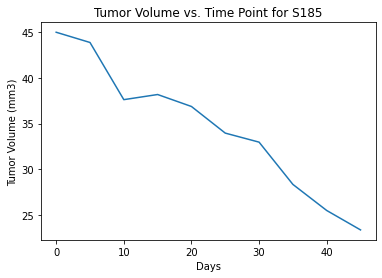

In [99]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = merge_data.loc[merge_data["Drug Regimen"] == "Capomulin"]
capomulin_df = capomulin_df.reset_index()

#print
capomulin_df.head()

#select a single mouse from the data
capomulin_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]

#print
capomulin_mouse

#line plot
x_axis = capomulin_mouse["Timepoint"]
y_axis = capomulin_mouse["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.title("Tumor Volume vs. Time Point for S185")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

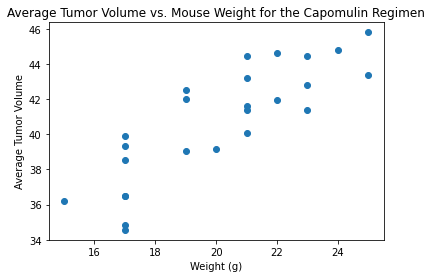

In [102]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#use .mean() with .groupby()
#then plot stuff

capomulin_df.head()

capomulin_average = capomulin_df.groupby(["Mouse ID"]).mean()
x_axis = capomulin_average["Weight (g)"]
y_axis = capomulin_average["Tumor Volume (mm3)"]
plt.scatter(x_axis, y_axis)
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.show


## Correlation and Regression

In [114]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#add linregress dependencies

x_axis = capomulin_average["Weight (g)"]
y_axis = capomulin_average["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")

plt.show()

NameError: name 'linregress' is not defined